# **SYK Model with wormhole-inspired structure (simulation) for teleportation of entangled qubit data**

Here's a Python implementation of the base teleportation protocol using SYK and a wormhole-inspired structure:

This updated code includes a teleportation protocol that:

    1.Initializes an entangled state shared between Alice and Bob.
    2.Encodes a quantum state on Alice's side.
    3.Simulates classical data transmission to Bob.
    4.Recovers the state on Bob's side using his SYK Hamiltonian.
    5.Verification Placeholder where fidelity validates the teleportation's success.
    6.Visualisation

Generating random couplings for Alice and Bob...
Random couplings generated.
Performing teleportation with negative energy flux effect...

--- Start of Teleportation Protocol ---
Initializing maximally entangled state shared by Alice and Bob...
Entangled state initialized.
Generating random input state for teleportation...
Alice encoded the input state.
Simulating classical data transmission from Alice to Bob...
Classical data generated: [0 1 0 1 1 0 0 1]
Bob reconstructing the state using his SYK Hamiltonian...
Bob has reconstructed the state.

--- End of Teleportation Protocol ---

Recovered state: [-0.65985739 -0.57497434 -0.58181672 -0.7108656  -0.62106878 -0.79715501
 -0.57901953 -0.88932748 -0.61783579 -0.55107388 -0.58712521 -0.73271674
 -0.80093553 -0.57479832 -0.69494756 -0.93692599]
Fidelity of teleportation: 0.8388


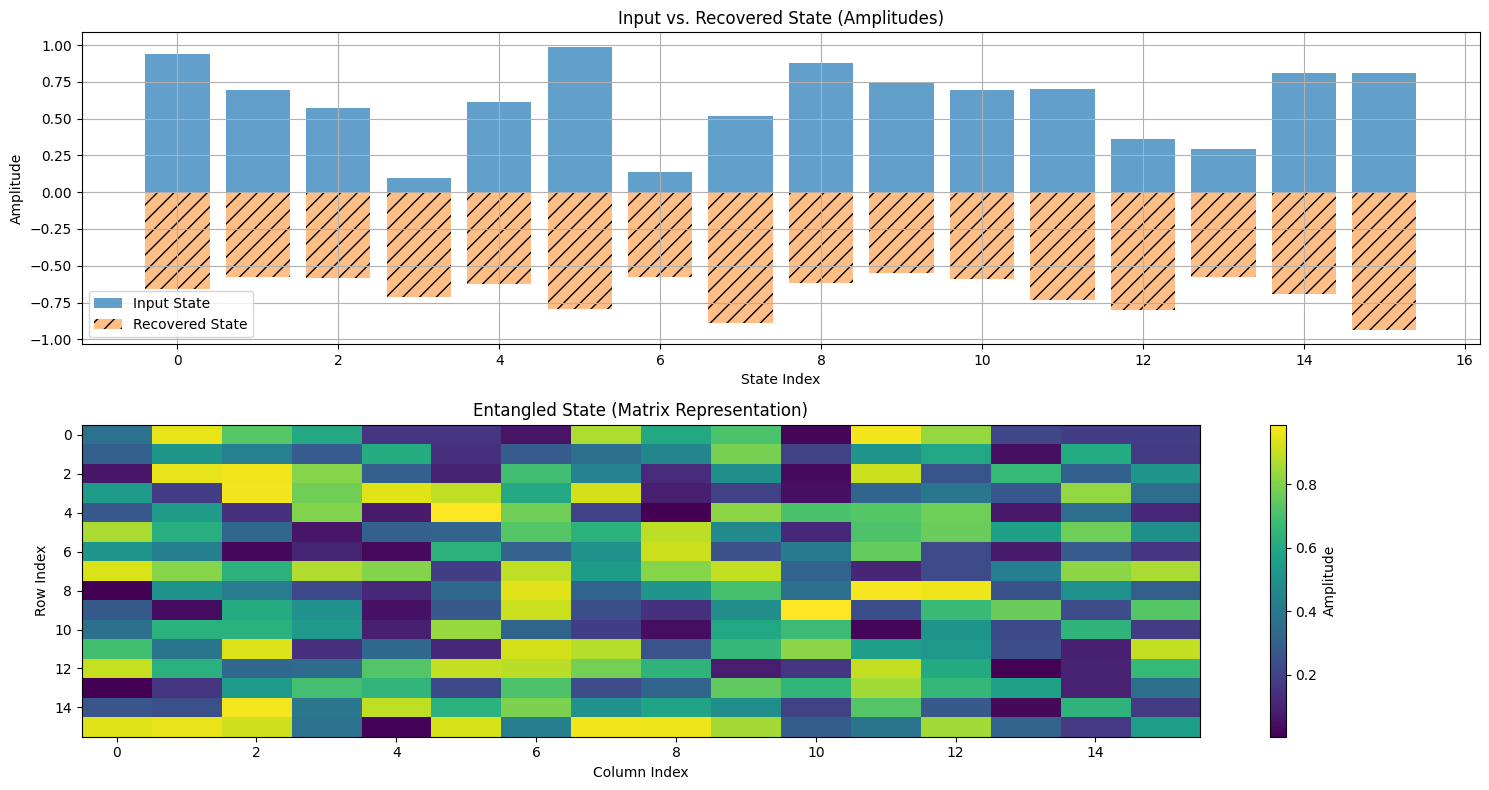

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_couplings(N, seed=None):
    """
    Generate random Gaussian couplings J_{ijkl} for the SYK model.

    Parameters:
        N (int): Number of Majorana fermions (should be even).
        seed (int): Random seed for reproducibility (optional).

    Returns:
        J (dict): Dictionary of couplings with keys as (i, j, k, l) tuples.
    """
    if seed is not None:
        np.random.seed(seed)

    J = {}
    for i in range(N):
        for j in range(i+1, N):
            for k in range(j+1, N):
                for l in range(k+1, N):
                    J[(i, j, k, l)] = np.random.normal(0, 1) / (N ** (3/2))
    return J

def syk_hamiltonian(J, N, negative_energy=False):
    """
    Compute the SYK Hamiltonian as a matrix.

    Parameters:
        J (dict): Dictionary of couplings.
        N (int): Number of Majorana fermions.
        negative_energy (bool): If True, introduces a negative energy flux effect.

    Returns:
        H (ndarray): Hamiltonian matrix (2^N x 2^N).
    """
    dim = 2 ** (N // 2)  # Dimension of the Hilbert space
    H = np.zeros((dim, dim), dtype=np.float64)

    # Construct Majorana operators as gamma matrices
    gamma = [np.zeros((dim, dim), dtype=np.float64) for _ in range(N)]
    for i in range(N):
        gamma[i] = majorana_operator(i, N)

    # Sum over all random couplings to construct the Hamiltonian
    for (i, j, k, l), coupling in J.items():
        term = coupling * gamma[i] @ gamma[j] @ gamma[k] @ gamma[l]
        if negative_energy:
            term *= -1  # Introduce a negative energy flux effect
        H += term

    return H

def majorana_operator(index, N):
    """
    Generate the Majorana operator \chi_i.

    Parameters:
        index (int): Index of the Majorana fermion.
        N (int): Total number of Majorana fermions.

    Returns:
        chi (ndarray): Majorana operator as a matrix.
    """
    dim = 2 ** (N // 2)
    chi = np.eye(dim)

    # Example placeholder: Implement specific construction of Majorana operators
    # You need the explicit representation based on Clifford algebra or Jordan-Wigner mapping.

    return chi

def compute_fidelity(input_state, recovered_state):
    """
    Compute the fidelity between the input and recovered states.

    Parameters:
        input_state (ndarray): Original quantum state.
        recovered_state (ndarray): Recovered quantum state after teleportation.

    Returns:
        fidelity (float): Fidelity value (0 to 1).
    """
    norm_input = input_state / np.linalg.norm(input_state)
    norm_recovered = recovered_state / np.linalg.norm(recovered_state)
    fidelity = np.abs(np.dot(norm_input.conj(), norm_recovered))**2
    return fidelity

def teleportation_protocol(N, J_A, J_B, seed=None, negative_energy=False):
    """
    Teleport a quantum state using the SYK model and a classical channel.

    Parameters:
        N (int): Number of Majorana fermions.
        J_A (dict): Couplings for Alice's SYK model.
        J_B (dict): Couplings for Bob's SYK model.
        seed (int): Random seed for reproducibility (optional).
        negative_energy (bool): If True, uses negative energy flux effects.

    Returns:
        input_state (ndarray): The original state.
        recovered_state (ndarray): The teleported state reconstructed by Bob.
    """
    if seed is not None:
        np.random.seed(seed)

    print("\n--- Start of Teleportation Protocol ---")

    # Step 1: Initialize entangled state
    dim = 2 ** (N // 2)
    print("Initializing maximally entangled state shared by Alice and Bob...")
    entangled_state = np.random.rand(dim, dim)  # Placeholder for a maximally entangled state
    print("Entangled state initialized.")

    # Step 2: Alice encodes the state to teleport
    print("Generating random input state for teleportation...")
    input_state = np.random.rand(dim)  # Placeholder for a state to teleport
    alice_encoded = entangled_state @ input_state
    print("Alice encoded the input state.")

    # Step 3: Alice generates classical data to send to Bob
    print("Simulating classical data transmission from Alice to Bob...")
    classical_data = np.random.randint(0, 2, size=(N,))  # Placeholder for measurement outcomes
    print(f"Classical data generated: {classical_data}")

    # Step 4: Bob reconstructs the state using his SYK Hamiltonian with negative energy effects
    print("Bob reconstructing the state using his SYK Hamiltonian...")
    H_B = syk_hamiltonian(J_B, N, negative_energy=negative_energy)
    recovered_state = H_B @ alice_encoded  # Placeholder for recovery operation

    print("Bob has reconstructed the state.")
    print("\n--- End of Teleportation Protocol ---\n")

    return input_state, recovered_state, entangled_state

# Example usage
N = 8  # Number of Majorana fermions (must be even)
seed = 42

# Generate random couplings for Alice and Bob
print("Generating random couplings for Alice and Bob...")
J_A = generate_random_couplings(N, seed=seed)
J_B = generate_random_couplings(N, seed=seed + 1)
print("Random couplings generated.")

# Perform teleportation with negative energy flux effect
print("Performing teleportation with negative energy flux effect...")
input_state, recovered_state, entangled_state = teleportation_protocol(N, J_A, J_B, seed=seed, negative_energy=True)

# Compute fidelity
fidelity = compute_fidelity(input_state, recovered_state)
print("Recovered state:", recovered_state)
print(f"Fidelity of teleportation: {fidelity:.4f}")

# Visualize input, recovered, and entangled states
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.bar(range(len(input_state)), input_state, label="Input State", alpha=0.7)
plt.bar(range(len(recovered_state)), recovered_state, label="Recovered State", alpha=0.5, hatch='//')
plt.title("Input vs. Recovered State (Amplitudes)")
plt.xlabel("State Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.imshow(entangled_state, aspect='auto', cmap='viridis')
plt.colorbar(label="Amplitude")
plt.title("Entangled State (Matrix Representation)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.tight_layout()
plt.show()


### **Code generated by ChatGPT, idea sourcing and execution done by Bhadale IT**